# Preliminary Sizing
### EAE 130A

The following code outlines how we performed our preliminary sizing calculations. It is derived from the preliminary sizing tutorial.

In [95]:
import math
import numpy as np
import matplotlib.pyplot as plt

Intro & Equation explanation

0.013
0.0251334215945771


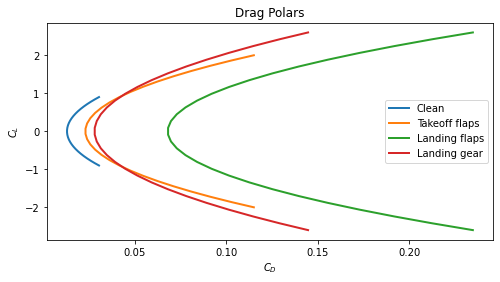

In [96]:
## Drag Polar Estimate
w_to = 57006    #lbs, takeoff weight
c_f = 0.0026    #skin friction coefficient, Raymer 12.3
c_l = 0.75       ##lift coefficient
"""
c = -0.0866     #Table 3.5 Roskam
d = 0.8099      #Table 3.5 Roskam
s_wet = (10**c)*(w_to**d)
print(s_wet)
rho = 0.0023769        #slug/ft3
c_lmax = 1.9
c_lcruise = 0.5
v_stall = 590.733*np.sqrt(c_lcruise/c_lmax)         #stall speed, ft/s
ws = 0.5*rho*(v_stall**2)*c_l #wingloading, Martins Eq 4.2  #lb/sqft
print(ws)   
s_ref = w_to/ws   #sq.ft, from tutorial
print(s_ref)  
""" 
s_ratio = 5     
c_do = c_f*(s_ratio)
print(c_do)
delta_cdo = [0, 0.010, 0.055, 0.015]
e_v = 0.80
ar = 18.44588       # aspect ratio, from openVSP model
c_d = c_do + ((c_l**2)/((np.pi)*e_v*ar))
print(c_d)
e_v = [0.80, 0.75, 0.70, 1] ## span efficiency factor, array

# Adjust C_Lmax for each flight configuration
cL_clean = np.linspace(-0.9,0.9,30)
cL_takeoff = np.linspace(-2,2,30)
cL_landing = np.linspace(-2.6,2.6,30)
clean = (c_do + delta_cdo[0]) + ((cL_clean**2)/((np.pi)*e_v[0]*ar))
takeoff = (c_do + delta_cdo[1]) + ((cL_takeoff**2)/((np.pi)*e_v[1]*ar))
landing_flaps = (c_do + delta_cdo[2]) + ((cL_landing**2)/((np.pi)*e_v[2]*ar))
landing_gear = (c_do + delta_cdo[3]) + ((cL_landing**2)/((np.pi)*e_v[3]*ar))

plt.figure(figsize=(8,4))
plt.title('Drag Polars')
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.plot(clean, cL_clean, label='Clean', linestyle='-', linewidth=2)
plt.plot(takeoff, cL_takeoff, label='Takeoff flaps', linestyle='-', linewidth=2)
plt.plot(landing_flaps, cL_landing, label='Landing flaps', linestyle='-', linewidth=2)
plt.plot(landing_gear, cL_landing, label='Landing gear', linestyle='-', linewidth=2)
plt.legend(loc='best')
plt.show()

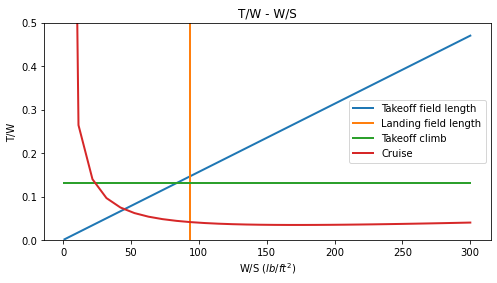

In [97]:
ws = np.linspace(1,300,30)
## Takeoff Field Length
bfl = 12000
top = bfl/37.5
s_land = bfl * 0.6
s_a = 1000      #from tutorial
rho_tot = 0.95  #given during tutorial
c_lto = 2.1
tw_tofl = ws/((rho_tot)*c_lto*top)
## Landing Field Length
c_llanding = 3.3    #cl max for landing
tw_landing = (((rho_tot*c_llanding)/(top*0.65))*(s_land - s_a))*np.ones(30)
## Climb
n_engines = 2
k_s = 1.2
g = 0.012
e_v = 0.75      ##assuming takeoff configuration
c_lmax = 1.9
tw_climb = ((1/0.8)*(n_engines/(n_engines - 1))*((((k_s**2)/c_lmax)*c_do)+(c_lmax/((k_s**2)*np.pi*e_v*ar))+g))*np.ones(30)
## Cruise
q = 228.8   ##lbf/ft2
tw_cruise = ((q*c_do)/ws) + ws*(1/(q*(np.pi)*ar*e_v))

plt.figure(figsize=(8,4))
plt.title('T/W - W/S')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("T/W")
plt.plot(ws, tw_tofl, label='Takeoff field length', linestyle='-', linewidth=2)
plt.plot(tw_landing, np.linspace(0,1,30), label='Landing field length', linestyle='-', linewidth=2)
plt.plot(ws, tw_climb, label='Takeoff climb', linestyle='-', linewidth=2)
plt.plot(ws, tw_cruise, label='Cruise', linestyle='-', linewidth=2)
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()